In [1]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [28]:
INPUT_DIR = 'dataset'
!ls {INPUT_DIR}


anime.csv  animelist.csv  anime_with_synopsis.csv  rating_complete.csv	watching_status.csv


In [3]:
rating_df = pd.read_csv(INPUT_DIR + '/animelist.csv',
                        low_memory=False,
                        usecols=["user_id", "anime_id", "rating"]
                        )

rating_df.head(4)


,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0


In [4]:
df = pd.read_csv(INPUT_DIR + '/anime.csv', low_memory=True)
df.head(6)


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
5,15,Eyeshield 21,7.95,"Action, Sports, Comedy, Shounen",Unknown,アイシールド21,TV,145,"Apr 6, 2005 to Mar 19, 2008",Spring 2005,...,9226.0,14904.0,22811.0,16734.0,6206.0,2621.0,795.0,336.0,140.0,151.0


In [5]:
df['anime_id'] = df['MAL_ID']
rating_df = pd.merge(rating_df, df[['anime_id', 'Name', 'Genres']], on='anime_id', how='inner')
rating_df


,user_id,anime_id,rating,Name,Genres
0,0,67,9,Basilisk: Kouga Ninpou Chou,"Action, Adventure, Historical, Supernatural, R..."
1,14,67,0,Basilisk: Kouga Ninpou Chou,"Action, Adventure, Historical, Supernatural, R..."
2,34,67,10,Basilisk: Kouga Ninpou Chou,"Action, Adventure, Historical, Supernatural, R..."
3,55,67,0,Basilisk: Kouga Ninpou Chou,"Action, Adventure, Historical, Supernatural, R..."
4,57,67,0,Basilisk: Kouga Ninpou Chou,"Action, Adventure, Historical, Supernatural, R..."
...,...,...,...,...,...
2994123,9998,45518,5,Urvan,"Sci-Fi, Mystery"
2994124,9998,42875,0,Chou Futsuu Toshi Kashiwa Densetsu: Ekimae Hou...,"Comedy, Fantasy"
2994125,10000,24677,0,Gegege no Kitarou: Kitarou Tanjou-hen,Supernatural
2994126,10000,28103,0,Gegege no Kitarou: Youkai Japan Rally 3D,"Adventure, Fantasy, Cars, Supernatural"


In [6]:
rating_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2994128 entries, 0 to 2994127
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   anime_id  int64 
 2   rating    int64 
 3   Name      object
 4   Genres    object
dtypes: int64(3), object(2)
memory usage: 114.2+ MB


In [7]:
# Number of users
print('The ratings dataset has', rating_df['user_id'].nunique(), 'unique users')

# Number of animes
print('The ratings dataset has', rating_df['Name'].nunique(), 'unique products')

# Number of ratings
print('The ratings dataset has', rating_df['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(rating_df['rating'].unique()))


The ratings dataset has 9291 unique users
The ratings dataset has 15623 unique products
The ratings dataset has 11 unique ratings
The unique ratings are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


<class 'pandas.core.frame.DataFrame'>
Index: 1639 entries, 4 to 15616
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               1639 non-null   object 
 1   mean_rating        1639 non-null   float64
 2   number_of_ratings  1639 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 51.2+ KB


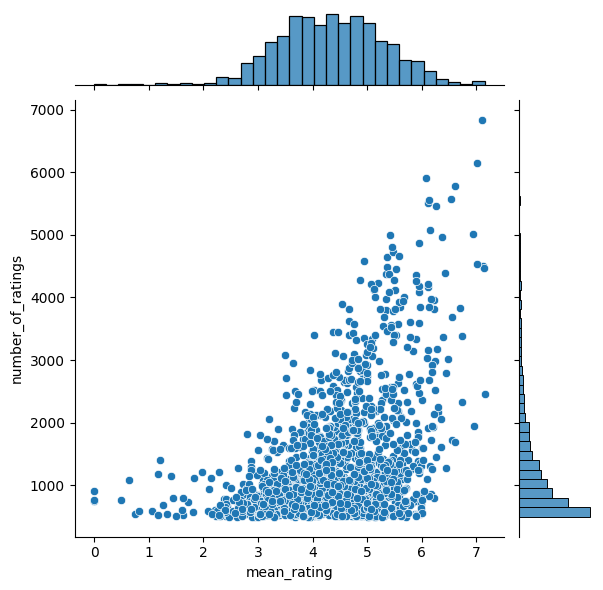

In [8]:
agg_ratings = rating_df.groupby('Name').agg(mean_rating = ('rating', 'mean'),
                                                number_of_ratings = ('rating', 'count')).reset_index()


# Visulization
#sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings)
agg_ratings = agg_ratings[agg_ratings['number_of_ratings'] >500]
agg_ratings.info()

# Visulization
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings)


In [9]:
df = pd.merge(rating_df, agg_ratings[['Name']], on='Name', how='inner')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128867 entries, 0 to 2128866
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   anime_id  int64 
 2   rating    int64 
 3   Name      object
 4   Genres    object
dtypes: int64(3), object(2)
memory usage: 81.2+ MB


In [10]:
# Number of users
print('The ratings dataset has', df['user_id'].nunique(), 'unique users')

# Number of animes
print('The ratings dataset has', df['Name'].nunique(), 'unique products')

# Number of ratings
print('The ratings dataset has', df['rating'].nunique(), 'unique ratings')

# List of unique ratings
print('The unique ratings are', sorted(df['rating'].unique()))


The ratings dataset has 9251 unique users
The ratings dataset has 1639 unique products
The ratings dataset has 11 unique ratings
The unique ratings are [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [11]:
# Create user-item matrix


g = rating_df.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:3000]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('Name')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:100]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='Name')

matrix = pd.crosstab(top_r.user_id, top_r.Name, top_r.rating, aggfunc=np.sum)
matrix


Name,Akame ga Kill!,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Another,Ansatsu Kyoushitsu,Ao no Exorcist,Baccano!,Bakemonogatari,Black Lagoon,Bleach,...,Toaru Majutsu no Index,Toki wo Kakeru Shoujo,Tokyo Ghoul,Tokyo Ghoul √A,Tonari no Kaibutsu-kun,Toradora!,Violet Evergarden,Yahari Ore no Seishun Love Comedy wa Machigatteiru.,Zankyou no Terror,Zero no Tsukaima
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,...,NaN,NaN,8.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0
3,7.0,8.0,8.0,8.0,NaN,8.0,9.0,8.0,9.0,NaN,...,7.0,NaN,NaN,NaN,9.0,8.0,10.0,8.0,0.0,7.0
6,NaN,10.0,10.0,0.0,NaN,0.0,9.0,0.0,NaN,5.0,...,NaN,9.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
12,0.0,10.0,10.0,0.0,NaN,0.0,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,NaN,0.0,0.0,NaN,10.0,NaN,0.0
16,NaN,7.0,NaN,6.0,NaN,NaN,8.0,7.0,0.0,NaN,...,6.0,NaN,6.0,NaN,NaN,7.0,NaN,7.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,9.0,0.0,0.0,9.0,9.0,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,NaN,0.0,10.0,0.0,8.0,8.0
10100,NaN,NaN,0.0,NaN,6.0,0.0,0.0,9.0,8.0,NaN,...,NaN,4.0,NaN,NaN,4.0,NaN,NaN,9.0,6.0,NaN
10105,7.0,7.0,7.0,0.0,NaN,6.0,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,7.0,NaN,8.0,7.0,NaN,9.0


In [12]:
# Normalize user-item matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 0)
matrix_norm.head(30)


Name,Akame ga Kill!,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Another,Ansatsu Kyoushitsu,Ao no Exorcist,Baccano!,Bakemonogatari,Black Lagoon,Bleach,...,Toaru Majutsu no Index,Toki wo Kakeru Shoujo,Tokyo Ghoul,Tokyo Ghoul √A,Tonari no Kaibutsu-kun,Toradora!,Violet Evergarden,Yahari Ore no Seishun Love Comedy wa Machigatteiru.,Zankyou no Terror,Zero no Tsukaima
user_id,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,-4.357143,NaN,-4.357143,-4.357143,-4.357143,NaN,...,NaN,NaN,3.642857,NaN,NaN,-4.357143,NaN,NaN,NaN,-4.357143
3,-0.644068,0.355932,0.355932,0.355932,NaN,0.355932,1.355932,0.355932,1.355932,NaN,...,-0.644068,NaN,NaN,NaN,1.355932,0.355932,2.355932,0.355932,-7.644068,-0.644068
6,NaN,4.595745,4.595745,-5.404255,NaN,-5.404255,3.595745,-5.404255,NaN,-0.404255,...,NaN,3.595745,NaN,NaN,NaN,-5.404255,NaN,NaN,NaN,NaN
12,-2.368421,7.631579,7.631579,-2.368421,NaN,-2.368421,NaN,-2.368421,NaN,NaN,...,-2.368421,-2.368421,NaN,NaN,-2.368421,-2.368421,NaN,7.631579,NaN,-2.368421
16,NaN,1.571429,NaN,0.571429,NaN,NaN,2.571429,1.571429,-5.428571,NaN,...,0.571429,NaN,0.571429,NaN,NaN,1.571429,NaN,1.571429,NaN,-5.428571
17,0.152941,3.152941,3.152941,1.152941,1.152941,2.152941,1.152941,NaN,NaN,1.152941,...,-6.847059,NaN,2.152941,-0.847059,-1.847059,3.152941,-6.847059,0.152941,1.152941,3.152941
19,-2.397436,-2.397436,1.602564,-0.397436,-3.397436,NaN,1.602564,1.602564,NaN,NaN,...,NaN,0.602564,0.602564,-1.397436,1.602564,1.602564,-2.397436,1.602564,-0.397436,NaN
21,-0.877193,0.122807,NaN,-0.877193,NaN,NaN,NaN,1.122807,0.122807,-0.877193,...,0.122807,NaN,0.122807,NaN,NaN,1.122807,0.122807,-0.877193,-0.877193,-0.877193
34,NaN,4.043478,-4.956522,-4.956522,NaN,-4.956522,NaN,3.043478,NaN,5.043478,...,-4.956522,NaN,NaN,NaN,4.043478,5.043478,NaN,NaN,NaN,5.043478


In [13]:
# User similarity matrix using Pearson correlation
user_similarity = matrix_norm.T.corr()
user_similarity


user_id,2,3,6,12,16,17,19,21,34,41,...,10066,10075,10079,10086,10092,10099,10100,10105,10106,10112
user_id,,,,,,,,,,,,,,,,,,,,,
2,1.000000,-0.011245,0.063555,0.276618,-0.236008,-0.166014,0.160341,0.211581,-0.189994,0.218720,...,0.161553,-0.234827,0.244396,-0.131869,0.193739,-0.156291,0.224176,-0.029872,NaN,0.225776
3,-0.011245,1.000000,-0.223006,-0.159555,0.016798,0.041235,0.014809,0.108335,-0.158387,-0.052211,...,0.193367,0.597419,0.122695,-0.130113,0.297491,-0.157001,-0.135938,0.077150,NaN,-0.139626
6,0.063555,-0.223006,1.000000,0.248163,-0.258543,0.100742,-0.232203,0.090724,-0.074478,0.027567,...,-0.225860,0.028950,0.009899,0.214211,0.066159,0.242377,-0.212975,-0.066654,NaN,0.338581
12,0.276618,-0.159555,0.248163,1.000000,0.043105,-0.072691,-0.049204,0.027100,0.240988,0.168375,...,-0.034821,-0.372370,0.081631,0.123019,0.128735,0.141480,0.155282,0.138275,NaN,0.106964
16,-0.236008,0.016798,-0.258543,0.043105,1.000000,-0.305501,0.040787,-0.013382,0.189548,0.217477,...,-0.091872,0.028071,0.154055,-0.045162,0.258346,-0.258994,-0.028290,0.182954,NaN,0.126594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10099,-0.156291,-0.157001,0.242377,0.141480,-0.258994,0.131964,-0.382572,0.245438,0.007414,0.144422,...,-0.236308,-0.205796,0.046035,0.242180,-0.232484,1.000000,-0.088554,0.199936,NaN,-0.062556
10100,0.224176,-0.135938,-0.212975,0.155282,-0.028290,0.240515,0.233972,-0.001391,0.303498,-0.139078,...,0.311586,0.022571,0.242411,0.366832,-0.071785,-0.088554,1.000000,0.245419,NaN,-0.218745
10105,-0.029872,0.077150,-0.066654,0.138275,0.182954,0.017715,-0.159993,0.146815,0.137097,-0.055276,...,-0.103243,-0.144068,0.335263,0.366882,-0.116648,0.199936,0.245419,1.000000,NaN,-0.136109


In [14]:
# User similarity matrix using cosine similarity
user_similarity_cosine = cosine_similarity(matrix_norm.fillna(0))
user_similarity_cosine


array([[ 1.        , -0.00793763,  0.02449702, ..., -0.00830615,
         0.        ,  0.1187058 ],
       [-0.00793763,  1.        , -0.0818479 , ...,  0.01580837,
         0.        , -0.08351014],
       [ 0.02449702, -0.0818479 ,  1.        , ..., -0.03093995,
         0.        ,  0.25424085],
       ...,
       [-0.00830615,  0.01580837, -0.03093995, ...,  1.        ,
         0.        , -0.07993969],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.1187058 , -0.08351014,  0.25424085, ..., -0.07993969,
         0.        ,  1.        ]])

In [15]:
# Pick a user ID
picked_userid = 146

# Remove picked user ID from the candidate list
user_similarity.drop(index=picked_userid, inplace=True)

# Take a look at the data
user_similarity.head()


user_id,2,3,6,12,16,17,19,21,34,41,...,10066,10075,10079,10086,10092,10099,10100,10105,10106,10112
user_id,,,,,,,,,,,,,,,,,,,,,
2,1.000000,-0.011245,0.063555,0.276618,-0.236008,-0.166014,0.160341,0.211581,-0.189994,0.218720,...,0.161553,-0.234827,0.244396,-0.131869,0.193739,-0.156291,0.224176,-0.029872,NaN,0.225776
3,-0.011245,1.000000,-0.223006,-0.159555,0.016798,0.041235,0.014809,0.108335,-0.158387,-0.052211,...,0.193367,0.597419,0.122695,-0.130113,0.297491,-0.157001,-0.135938,0.077150,NaN,-0.139626
6,0.063555,-0.223006,1.000000,0.248163,-0.258543,0.100742,-0.232203,0.090724,-0.074478,0.027567,...,-0.225860,0.028950,0.009899,0.214211,0.066159,0.242377,-0.212975,-0.066654,NaN,0.338581
12,0.276618,-0.159555,0.248163,1.000000,0.043105,-0.072691,-0.049204,0.027100,0.240988,0.168375,...,-0.034821,-0.372370,0.081631,0.123019,0.128735,0.141480,0.155282,0.138275,NaN,0.106964
16,-0.236008,0.016798,-0.258543,0.043105,1.000000,-0.305501,0.040787,-0.013382,0.189548,0.217477,...,-0.091872,0.028071,0.154055,-0.045162,0.258346,-0.258994,-0.028290,0.182954,NaN,0.126594


In [16]:
# Number of similar users
n = 10

# User similarity threashold
user_similarity_threshold = 0.3

# Get top n similar users
similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

# Print out top n similar users
print(f'The similar users for user {picked_userid} are', similar_users)


The similar users for user 146 are user_id
7976    0.710828
457     0.604648
8941    0.568797
1189    0.536210
7183    0.532955
4143    0.521299
4917    0.519568
7695    0.519285
7748    0.512544
9692    0.507040
Name: 146, dtype: float64


In [17]:
# Animes that the target user has watched
picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')
picked_userid_watched


Name,Akame ga Kill!,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Another,Ansatsu Kyoushitsu,Ao no Exorcist,Baccano!,Bakemonogatari,Black Lagoon,Bleach,...,Toaru Majutsu no Index,Toki wo Kakeru Shoujo,Tokyo Ghoul,Tokyo Ghoul √A,Tonari no Kaibutsu-kun,Toradora!,Violet Evergarden,Yahari Ore no Seishun Love Comedy wa Machigatteiru.,Zankyou no Terror,Zero no Tsukaima
user_id,,,,,,,,,,,,,,,,,,,,,
146,-5.3,1.7,2.7,1.7,1.7,0.7,-5.3,-5.3,-5.3,1.7,...,-5.3,1.7,2.7,2.7,3.7,3.7,3.7,-5.3,-5.3,0.7


In [18]:
# Animes that similar users watched. Remove animes that none of the similar users have watched
similar_user_animes = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_animes

Name,Akame ga Kill!,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Another,Ansatsu Kyoushitsu,Ao no Exorcist,Baccano!,Bakemonogatari,Black Lagoon,Bleach,...,Toaru Majutsu no Index,Toki wo Kakeru Shoujo,Tokyo Ghoul,Tokyo Ghoul √A,Tonari no Kaibutsu-kun,Toradora!,Violet Evergarden,Yahari Ore no Seishun Love Comedy wa Machigatteiru.,Zankyou no Terror,Zero no Tsukaima
user_id,,,,,,,,,,,,,,,,,,,,,
457,1.910256,2.910256,2.910256,-7.089744,1.910256,1.910256,-7.089744,-7.089744,-7.089744,NaN,...,-7.089744,1.910256,2.910256,1.910256,2.910256,1.910256,NaN,0.910256,2.910256,0.910256
1189,-5.425532,NaN,NaN,3.574468,NaN,-5.425532,NaN,NaN,-5.425532,NaN,...,NaN,NaN,3.574468,0.574468,NaN,NaN,2.574468,1.574468,NaN,NaN
4143,1.923077,3.923077,1.923077,2.923077,NaN,NaN,-6.076923,-6.076923,NaN,NaN,...,3.923077,NaN,NaN,NaN,NaN,1.923077,2.923077,NaN,NaN,2.923077
4917,NaN,NaN,NaN,1.047619,NaN,NaN,NaN,NaN,-7.952381,NaN,...,NaN,NaN,NaN,NaN,2.047619,0.047619,-7.952381,NaN,NaN,NaN
7183,1.196970,0.196970,-1.803030,2.196970,1.196970,2.196970,NaN,-0.803030,NaN,NaN,...,NaN,0.196970,0.196970,NaN,1.196970,1.196970,2.196970,-6.803030,0.196970,NaN
7695,NaN,NaN,NaN,0.259259,NaN,0.259259,NaN,NaN,NaN,1.259259,...,NaN,NaN,-0.740741,-1.740741,NaN,NaN,NaN,NaN,0.259259,NaN
7748,-0.433333,0.566667,NaN,NaN,2.566667,0.566667,-7.433333,NaN,-7.433333,2.566667,...,0.566667,NaN,1.566667,0.566667,NaN,NaN,NaN,-7.433333,NaN,-0.433333
7976,NaN,NaN,-0.760000,NaN,0.240000,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.760000,NaN,NaN,NaN,-0.760000,1.240000,NaN,-8.760000,NaN
8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.818182,-1.818182,NaN,NaN,NaN,-7.818182,0.181818,1.181818


In [19]:

# Remove the watched anime from the anime list
similar_user_animes.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

# Take a look at the data
similar_user_animes

Name,Code Geass: Hangyaku no Lelouch,Code Geass: Hangyaku no Lelouch R2,Cowboy Bebop,Darker than Black: Kuro no Keiyakusha,Fate/stay night,NHK ni Youkoso!,Neon Genesis Evangelion,One Piece,Soul Eater,Tengen Toppa Gurren Lagann
user_id,,,,,,,,,,
457,-7.089744,NaN,NaN,-7.089744,NaN,-7.089744,NaN,NaN,-7.089744,-7.089744
1189,NaN,NaN,-5.425532,NaN,NaN,NaN,-5.425532,NaN,-5.425532,NaN
4143,NaN,NaN,-6.076923,NaN,NaN,-6.076923,3.923077,2.923077,NaN,NaN
4917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.047619,NaN
7183,-6.803030,NaN,NaN,NaN,NaN,NaN,-0.803030,NaN,NaN,0.196970
7695,2.259259,2.259259,0.259259,NaN,NaN,NaN,2.259259,NaN,NaN,0.259259
7748,2.566667,2.566667,NaN,2.566667,-7.433333,-7.433333,NaN,2.566667,NaN,2.566667
7976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# A dictionary to store item scores
item_score = {}

# Loop through items
for i in similar_user_animes.columns:
  # Get the ratings for anime i
  anime_rating = similar_user_animes[i]
  # Create a variable to store the score
  total = 0
  # Create a variable to store the number of scores
  count = 0
  # Loop through similar users
  for u in similar_users.index:
    # If the anime has rating
    if pd.isna(anime_rating[u]) == False:
      # Score is the sum of user similarity score multiply by the anime rating
      score = similar_users[u] * anime_rating[u]
      # Add the score to the total score for the anime so far
      total += score
      # Add 1 to the count
      count +=1
  # Get the average score for the item
  item_score[i] = total / count

# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['Name', 'anime_score'])

# Sort the animes by score
ranked_item_score = item_score.sort_values(by='anime_score', ascending=False)

# Select top m animes
m = 30
ranked_item_score.head(m)


,Name,anime_score
7,One Piece,1.419663
1,Code Geass: Hangyaku no Lelouch R2,1.351751
6,Neon Genesis Evangelion,-0.724556
9,Tengen Toppa Gurren Lagann,-0.740068
0,Code Geass: Hangyaku no Lelouch,-0.771451
3,Darker than Black: Kuro no Keiyakusha,-0.975288
8,Soul Eater,-1.398057
4,Fate/stay night,-1.628731
2,Cowboy Bebop,-1.980829
5,NHK ni Youkoso!,-3.754867


In [21]:
# Average rating for the picked user
avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]

# Print the average anime rating for user 1
print(f'The average anime rating for user {picked_userid} is {avg_rating:.2f}')


The average anime rating for user 146 is 5.30


In [22]:
# Calcuate the predicted rating
ranked_item_score['predicted_rating'] = ranked_item_score['anime_score'] + avg_rating

# Take a look at the data
ranked_item_score.head(m)


,Name,anime_score,predicted_rating
7,One Piece,1.419663,6.719663
1,Code Geass: Hangyaku no Lelouch R2,1.351751,6.651751
6,Neon Genesis Evangelion,-0.724556,4.575444
9,Tengen Toppa Gurren Lagann,-0.740068,4.559932
0,Code Geass: Hangyaku no Lelouch,-0.771451,4.528549
3,Darker than Black: Kuro no Keiyakusha,-0.975288,4.324712
8,Soul Eater,-1.398057,3.901943
4,Fate/stay night,-1.628731,3.671269
2,Cowboy Bebop,-1.980829,3.319171
5,NHK ni Youkoso!,-3.754867,1.545133


In [23]:
rating_df = pd.merge(ranked_item_score, df[['Name', 'Genres']], on='Name', how='inner')
rating_df = rating_df.drop_duplicates()
rating_df


,Name,anime_score,predicted_rating,Genres
0,One Piece,1.419663,6.719663,"Action, Adventure, Comedy, Super Power, Drama,..."
3780,Code Geass: Hangyaku no Lelouch R2,1.351751,6.651751,"Action, Military, Sci-Fi, Super Power, Drama, ..."
8282,Neon Genesis Evangelion,-0.724556,4.575444,"Action, Sci-Fi, Dementia, Psychological, Drama..."
12401,Tengen Toppa Gurren Lagann,-0.740068,4.559932,"Action, Adventure, Comedy, Mecha, Sci-Fi"
16850,Code Geass: Hangyaku no Lelouch,-0.771451,4.528549,"Action, Military, Sci-Fi, Super Power, Drama, ..."
22414,Darker than Black: Kuro no Keiyakusha,-0.975288,4.324712,"Action, Sci-Fi, Mystery, Super Power"
26031,Soul Eater,-1.398057,3.901943,"Action, Fantasy, Comedy, Supernatural, Shounen"
30317,Fate/stay night,-1.628731,3.671269,"Action, Supernatural, Magic, Romance, Fantasy"
33672,Cowboy Bebop,-1.980829,3.319171,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
37793,NHK ni Youkoso!,-3.754867,1.545133,"Comedy, Psychological, Drama, Romance"


In [24]:
def recommend_anime(inputId):

    # Pick a user ID
    picked_userid = inputId

    # Check if picked_userid is in the index
    if picked_userid not in user_similarity.index:
        print(f"User ID {picked_userid} not found. Returning empty recommendations.")
        return pd.DataFrame()  # Return an empty DataFrame if user ID not found

    # Remove picked user ID from the candidate list
    user_similarity.drop(index=picked_userid, inplace=True)

    # Number of similar users
    n = 10

    # User similarity threashold
    user_similarity_threshold = 0.3

    # Get top n similar users
    similar_users = user_similarity[user_similarity[picked_userid]>user_similarity_threshold][picked_userid].sort_values(ascending=False)[:n]

    # Animes that the target user has watched
    picked_userid_watched = matrix_norm[matrix_norm.index == picked_userid].dropna(axis=1, how='all')


    # Animes that similar users watched. Remove animes that none of the similar users have watched
    similar_user_animes = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')


    # Remove the watched anime from the anime list
    similar_user_animes.drop(picked_userid_watched.columns,axis=1, inplace=True, errors='ignore')

    # A dictionary to store item scores
    item_score = {}

    # Loop through items
    for i in similar_user_animes.columns:
      # Get the ratings for anime i
      anime_rating = similar_user_animes[i]
      # Create a variable to store the score
      total = 0
      # Create a variable to store the number of scores
      count = 0
      # Loop through similar users
      for u in similar_users.index:
        # If the anime has rating
        if pd.isna(anime_rating[u]) == False:
          # Score is the sum of user similarity score multiply by the anime rating
          score = similar_users[u] * anime_rating[u]
          # Add the score to the total score for the anime so far
          total += score
          # Add 1 to the count
          count +=1
      # Get the average score for the item
      item_score[i] = total / count
        # Convert dictionary to pandas dataframe
    item_score = pd.DataFrame(item_score.items(), columns=['Name', 'anime_score'])

    # Sort the animes by score
    ranked_item_score = item_score.sort_values(by='anime_score', ascending=False)

    # Select top m animes
    m = 30

    # Average rating for the picked user
    # Handle the case where picked_userid might not be in matrix
    if picked_userid in matrix.index:
        avg_rating = matrix[matrix.index == picked_userid].T.mean()[picked_userid]
    else:
        avg_rating = 0  # Or some default value if the user is not found

    # Calcuate the predicted rating
    ranked_item_score['predicted_rating'] = ranked_item_score['anime_score'] + avg_rating

    # Take a look at the data
    rating_df = pd.merge(ranked_item_score, df[['Name', 'Genres']], on='Name', how='inner')
    rating_df = rating_df.drop_duplicates()

    genre_lists = rating_df['Genres'].str.split(',')


    all_genres = []
    for genres in genre_lists:
        all_genres.extend(genres)

    genre_counts = pd.Series(all_genres).value_counts()
    top_3_genres = genre_counts.head(3)


    print('추천장르: ')
    for genre, count in top_3_genres.items():
        print(genre)
    print('\n 추천영화: ')
    print(rating_df['Name'])


In [33]:
recommend_anime(891)

추천장르: 
Action
 Shounen
 Adventure

 추천영화: 
0                            Koe no Katachi
3835                     Naruto: Shippuuden
8023                    Howl no Ugoku Shiro
11403                                Naruto
16486    Code Geass: Hangyaku no Lelouch R2
20988                 Byousoku 5 Centimeter
24571                        Kimi no Na wa.
29034         Sen to Chihiro no Kamikakushi
33575                             One Piece
37355                         Mononoke Hime
40723                   Fullmetal Alchemist
44814                            Fairy Tail
49042                       Fate/stay night
52397                 Toki wo Kakeru Shoujo
55608                                Bleach
59985                  Clannad: After Story
63798                      Samurai Champloo
Name: Name, dtype: object
